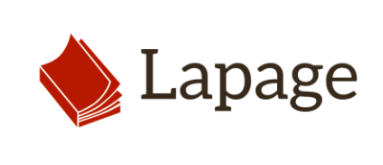



# <center>ANALYSE DES VENTES </center>

## Importation et inspection des data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

# Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Utiliser plotly en local
cf.go_offline()

# créer des grafs et les customiser
import plotly.graph_objects as go

### Importation des fichiers de données

#### Fichier CLIENTS
Ce fichier comprend 3 variables : <br>
- l'id du client
- le genre
- l'année de naissance

In [2]:
client = pd.read_csv('customers.csv', sep = ',' )
client.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


#### Fichier PRODUITS
Ce fichier comprend 3 variables : <br>
- l'id du produit
- le prix
- la catégorie

In [3]:
produit = pd.read_csv('products.csv', sep = ',' )
produit.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


#### Fichier VENTES
Ce fichier comprend 4 variables : <br>
- l'id du produit
- la date de la transaction
- l'id de la session
- l'id du client

In [4]:
vente = pd.read_csv('transactions.csv', sep = ',' )
vente.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


L'id de la session ne nous sera d'aucune utilité ici, nous ne le gardons pas

In [5]:
vente = vente[["id_prod", "date", "client_id"]]
vente.head()

,id_prod,date,client_id
0,0_1518,2022-05-20 13:21:29.043970,c_103
1,1_251,2022-02-02 07:55:19.149409,c_8534
2,0_1277,2022-06-18 15:44:33.155329,c_6714
3,2_209,2021-06-24 04:19:29.835891,c_6941
4,0_1509,2023-01-11 08:22:08.194479,c_4232


### Inspection et contrôle des données

#### Inspection des données : info, describe

In [6]:
# client.info()
# vente.info()
# produit.info()
# client.describe()
produit.describe()
# vente.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


Nous constatons d'ores et déjà un problème au niveau des données : <br>
En effet, la ligne MIN indique un prix négatif.

In [7]:
# client.info()
# vente.info()
# produit.info()
# client.describe()
# produit.describe()
vente.describe()

,id_prod,date,client_id
count,679532,679532,679532
unique,3267,679371,8602
top,1_369,test_2021-03-01 02:30:02.237413,c_1609
freq,2252,13,25488


Ici aussi, nous constatons un problème, cette fois-ci avec le champs DATE. <br>
La ligne TOP indique une date commençant par "test_"

#### Contrôle des données 

##### Recherche des valeurs nulles

In [8]:
# vérification des NaN fichier CLIENTS
client.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [9]:
# vérification des NaN fichier PRODUITS
produit.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [10]:
# vérification des NaN fichier VENTES
vente.isnull().sum()

id_prod      0
date         0
client_id    0
dtype: int64

##### Recherche des doublons

In [11]:
# recherche des doublons dans le fichier CLIENTS
client.duplicated().sum()

0

In [12]:
# recherche des doublons dans le fichier PRODUITS
produit.duplicated().sum()

0

In [13]:
# recherche des doublons dans le fichier VENTE
vente.duplicated().sum()

126

##### Vérification des formats

In [14]:
# vérification des formats du fichier CLIENTS
client.dtypes

client_id    object
sex          object
birth         int64
dtype: object

La variable "client_id" est de type objet car le code se compose ainsi : c_xxxx

In [15]:
# vérification des formats du fichier PRODUITS
produit.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

la variable "product_id" est de type object car le code se compose ainsi : x_xxx

In [16]:
# vérification des formats du fichier VENTES
vente.dtypes

id_prod      object
date         object
client_id    object
dtype: object

la variable "date" est de type objet et non date

### Nettoyage des données

#### Suppression des doublons

In [17]:
# suppression des doublons dans le fichier VENTE
vente = vente.drop_duplicates()

# et je vérifie 
vente.duplicated().sum()

0

#### Suppression des valeurs test

In [18]:
# Recherche des valeurs test dans le fichier VENTE :
list_v = []
for column in vente:
    list_v.append(vente.loc[vente[column].str.contains("test")])
list_v       

[Empty DataFrame
 Columns: [id_prod, date, client_id]
 Index: [],
        id_prod                             date client_id
 3019       T_0  test_2021-03-01 02:30:02.237419      ct_0
 5138       T_0  test_2021-03-01 02:30:02.237425      ct_0
 9668       T_0  test_2021-03-01 02:30:02.237437      ct_1
 10728      T_0  test_2021-03-01 02:30:02.237436      ct_0
 15292      T_0  test_2021-03-01 02:30:02.237430      ct_0
 ...        ...                              ...       ...
 577324     T_0  test_2021-03-01 02:30:02.237424      ct_0
 593065     T_0  test_2021-03-01 02:30:02.237422      ct_1
 607892     T_0  test_2021-03-01 02:30:02.237412      ct_0
 626049     T_0  test_2021-03-01 02:30:02.237422      ct_0
 670680     T_0  test_2021-03-01 02:30:02.237449      ct_1
 
 [74 rows x 3 columns],
 Empty DataFrame
 Columns: [id_prod, date, client_id]
 Index: []]

Nous avons donc 74 lignes de test. <br>
NB : les identifiants produits de type T_0 sont des tests, de même que les identifiants client de type CT_0 ou CT_1

In [19]:
# Suppression des valeurs test dans le fichier VENTE : 

# récupère les index des lignes contenant 'test'
test_v = list_v[1].index
test_v

# supprime ces lignes du fichier VENTE : 
vente = vente.drop(test_v)
vente.shape   # mes 74 lignes ont bien été supprimées

(679332, 3)

In [20]:
# Recherche des valeurs test dans le fichier PRODUITS :
# seule la colonne ID_PROD est au format 'texte' : 
list_p = produit.loc[produit['id_prod'].str.contains("T")]
list_p

,id_prod,price,categ
731,T_0,-1.0,0


Je n'ai qu'une seule ligne contenant un identifiant produit de test.<br>
Je dois ensuite vérifier qu'il n'y a pas d'autre prix négatif.

In [21]:
# recherche des tarifs négatifs dans le fichier PRODUITS : 
prix_neg = produit.loc[produit['price']<0]
prix_neg

,id_prod,price,categ
731,T_0,-1.0,0


il s'agit de la même ligne. <br>
Je n'ai donc qu'une seule ligne à supprimer dans ce fichier

In [22]:
# Suppression des valeurs test
produit = produit.drop(731)
produit.shape    # ma ligne a bien été supprimée

(3286, 3)

In [23]:
# Recherche des valeurs test dans le fichier CLIENTS :
# je ne vais faire la recherche que sur l'identifiant client : 
liste_c = client.loc[client['client_id'].str.contains("ct")]
liste_c

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [24]:
# Suppression des valeurs test
client = client.drop(liste_c.index)
client.shape

(8621, 3)

#### Correction des formats incohérents

In [25]:
# modification du format de la colonne DATE du fichier VENTE :
vente.head(1)

,id_prod,date,client_id
0,0_1518,2022-05-20 13:21:29.043970,c_103


ce format est de type objet. <br>
de plus, il est trop détaillé : nous n'avons besoin que d'un format de type '%Y-%m-%d %H:%M:%S'

In [26]:
# suppression des informations inutiles : 
# tout ce qui est après le point : 
vente['date'] = vente['date'].str.split('.', expand= True)[0]

# transformation du type objet en date
vente['date']=pd.to_datetime(vente['date']) 
vente.dtypes

id_prod              object
date         datetime64[ns]
client_id            object
dtype: object

In [27]:
vente.head(1)

,id_prod,date,client_id
0,0_1518,2022-05-20 13:21:29,c_103


## Analyse du CA

### Indicateurs

Dans un premier temps, nous allons définir nos KPI : <br>
- CA total
- CA dans le temps
- CA par catégorie
- CA par prix de vente
- CA par genre
- CA par âge

Puis nous allons calculer le CA total :

In [88]:
# jointure vente / produit
# left car la table vente contient plus de lignes et je veux toutes les avoir
base_ca = pd.merge(vente, produit, how='left', on='id_prod')

# le CA total correspond à la somme de la colonne price
CA_total = base_ca["price"].sum()
print("Le chiffre d'affaires total de ces deux dernières années est de : "+ f'{CA_total:,}' + '€')

Le chiffre d'affaires total de ces deux dernières années est de : 11,853,728.68€


### Evolution temporelle

In [93]:
pwd

'C:\\Users\\grand\\P6_Librairie'

### Zoom sur les produits

In [90]:
# tops (CA, nb ventes)


In [91]:
# flops (CA, nb ventes)


In [72]:
# Calcul du CA par catégorie

# group by CATEG et aggrégation (somme) sur le prix
CA_categ = base_ca.groupby('categ')['price'].sum()

# représentation graphique
print('La répartition du CA par catégorie : ')
fig = go.Figure(data=[go.Pie(labels=['Cat 0', 'Cat 1', 'Cat 2'], 
                            values=[CA_categ[0],CA_categ[1],CA_categ[2]])])

colors =['lightblue', 'honeydew', 'lightsteelblue']
fig.update_traces(hoverinfo='label+value', 
                  textfont_size=15, 
                  textinfo='label+percent', 
                  pull=[0.1, 0.1, 0.1], # on décale les quartiers
                  marker=dict(
                     colors=colors, 
                     line=dict(color='#FFFFFF', width=2)
                            ))
           

La répartition du CA par catégorie : 


In [87]:
# Répartition du CA en fonction du Prix

# group by PRICE et aggrégation sur ID_PROD (count)
CA_price = base_ca.groupby('price')['id_prod'].count()

# représentation graphique
fig = go.Figure(data=go.Scattergl(
x= CA_price.index, 
y = CA_price.values, 
mode='markers', 
marker=dict(
color=np.random.randn(3000), 
colorscale='Viridis',
line_width=1)
))
fig

# CA_price[15.99]

In [89]:
# boxplot pour evt outliers

### Zoom sur les clients

In [ ]:
# profils


In [ ]:
# répartition du CA par genre
# NB courbe de lorenz

In [ ]:
# répartition du CA par âge
# NB courbe de lorenz

### Recherche de liens

In [92]:
# reprendre la 'procédure' de déroulé des stat

# tests : loi normale, anova, chi²

# analyse, explication

## Analyse Clients